In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


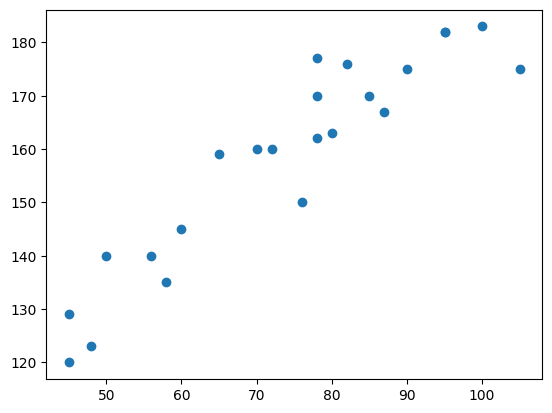

In [14]:
plt.scatter( df['Weight'],df['Height'])

In [21]:
X = df[['Weight']]
y = df['Height']

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [61]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((18, 1), (5, 1), (18,), (5,))

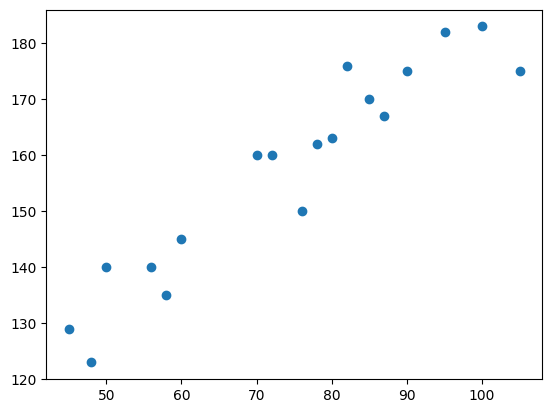

In [62]:
plt.scatter( X_train,y_train)

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()

In [65]:
X_train = scaler.fit_transform(X_train)

In [66]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [84]:
X_test = scaler.transform(X_test)

In [68]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

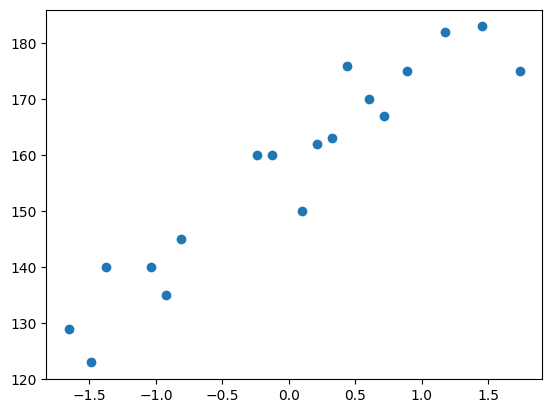

In [69]:
plt.scatter( X_train,y_train)

In [70]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [71]:
regressor.fit(X_train,y_train)

LinearRegression()

In [72]:
regressor.coef_

array([17.03440872])

In [73]:
regressor.coef_[0]

17.034408719095538

In [74]:
regressor.intercept_

157.5

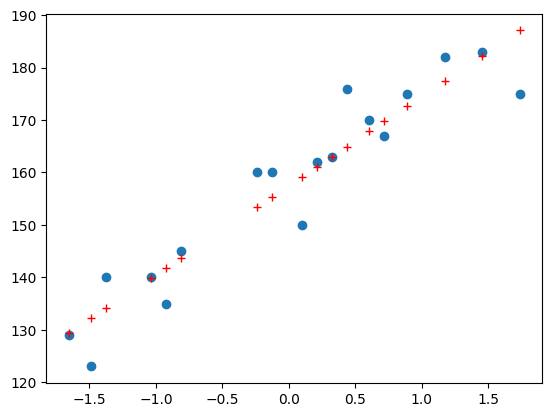

In [78]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r+')

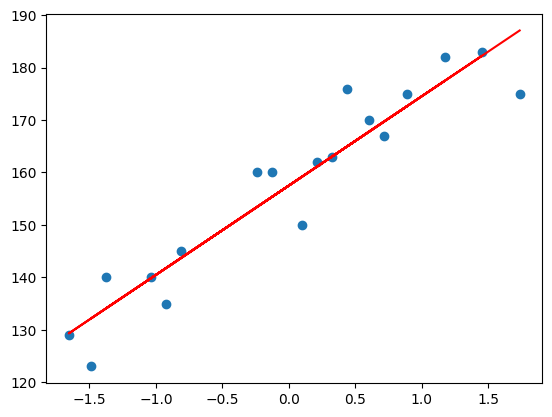

In [79]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

In [82]:
y_pred_test = regressor.predict(X_test)
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [90]:
y_pred_test , y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

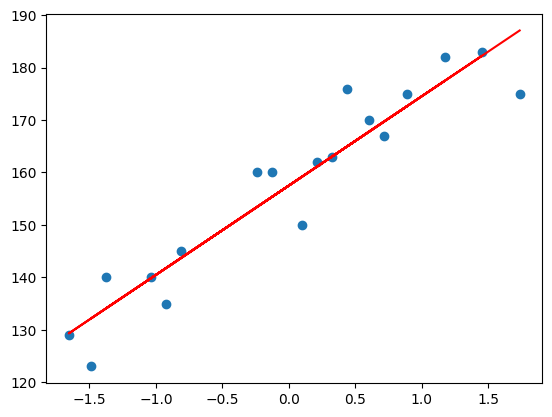

In [80]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

In [91]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [93]:
print(mean_squared_error(y_test,y_pred_test))
print(mean_absolute_error(y_test,y_pred_test))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

109.77592599051664
9.822657814519232
10.477400726827081


In [94]:
from sklearn.metrics import r2_score

In [96]:
score =r2_score(y_test,y_pred_test)

In [97]:
score

0.776986986042344

In [99]:
1 - (1-score)*(len(y_test) -1)/((len(y_test)-len(X_test[0]))-1)

0.7026493147231252

## Assumptions

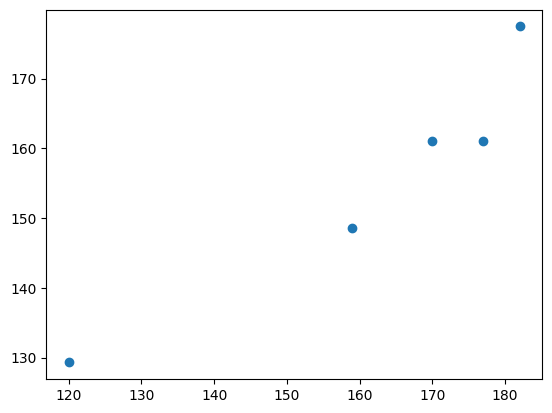

In [100]:
plt.scatter(y_test,y_pred_test)

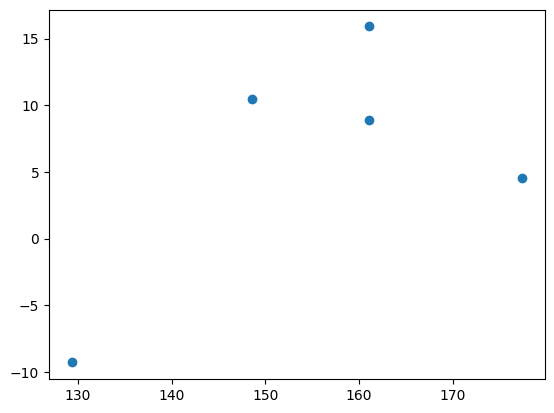

In [102]:
residuals = y_test - y_pred_test
plt.scatter(y_pred_test,residuals)

<Axes: xlabel='Height', ylabel='Density'>

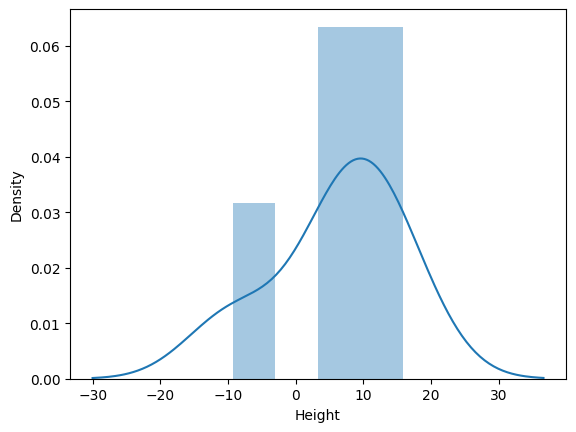

In [105]:
sns.distplot(residuals,kde=True)

In [111]:
scaled_weight = scaler.transform([[80]])

In [112]:
scaled_weight

array([[0.32350772]])

In [113]:
regressor.predict([scaled_weight[0]])

array([163.01076266])